# Model Training & Evaluation

* keep in mind that the preprocessed dataset should be used for the training
* output is not yet generated from last section so original csv file is used until then
* in the dataexploration the most important variables have been determined that best describe PTS in theory


In [2]:
#importing all the relevant modules libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



## Step 6: Importing the ***cleaned, encoded & normalized*** data from the preprocessing notebook

In [3]:
df = pd.read_csv('/Users/robertkurtz/Desktop/NBA 2023 Dataplayground/data/df_preprocessed.csv', delimiter=',', encoding='ISO-8859-1' )
df 

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,0.697,2.1,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,0.806,2.7,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6
3,4,Ochai Agbaji,SG,22,UTA,35,1,14.0,1.5,3.2,...,0.625,0.6,1.0,1.6,0.5,0.1,0.1,0.3,1.4,4.1
4,5,Santi Aldama,PF,22,MEM,52,18,22.0,3.4,7.0,...,0.730,1.0,3.7,4.7,1.2,0.7,0.7,0.7,1.9,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,Delon Wright,PG,30,WAS,26,2,22.1,2.1,5.1,...,0.903,0.9,2.2,3.1,3.7,1.9,0.3,0.8,1.4,6.0
501,502,McKinley Wright IV,PG,24,DAL,19,1,10.2,1.0,2.4,...,0.600,0.3,1.1,1.4,1.7,0.4,0.2,0.6,0.9,2.4
502,503,Thaddeus Young,PF,34,TOR,45,9,16.1,2.2,4.0,...,0.692,1.4,1.9,3.4,1.5,1.1,0.1,0.8,1.8,5.0
503,504,Trae Young,PG,24,ATL,50,50,35.5,8.5,19.8,...,0.887,0.7,2.3,3.0,10.2,1.0,0.2,4.2,1.5,26.9


In [4]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Step 7: Reducing the Dataset to the necessary

* from the data exploration part we know which variables we want to use for the regression

In [5]:
# From the EDA the following variables/ features have been selected for regression:

predictor_columns = ['FGA', '2PA', 'FTA', 'MP', 'TOV', 'AST', '3PA', 'GS', 'DRB']

# target variable
target = 'PTS'

# create a new dataframe with the selected columns
relevant_columns = predictor_columns + [target]
df_selected = df[relevant_columns]
df_selected

,FGA,2PA,FTA,MP,TOV,AST,3PA,GS,DRB,PTS
0,8.2,6.0,2.7,23.0,1.2,1.1,2.2,9,4.3,10.4
1,6.3,6.2,3.1,27.0,1.9,2.3,0.0,42,6.5,8.6
2,15.7,15.5,5.5,35.3,2.6,3.3,0.2,52,7.3,21.6
3,3.2,1.3,0.5,14.0,0.3,0.5,1.9,1,1.0,4.1
4,7.0,3.3,1.9,22.0,0.7,1.2,3.7,18,3.7,9.5
...,...,...,...,...,...,...,...,...,...,...
500,5.1,2.8,1.2,22.1,0.8,3.7,2.3,2,2.2,6.0
501,2.4,1.7,0.5,10.2,0.6,1.7,0.6,1,1.1,2.4
502,4.0,3.3,0.6,16.1,0.8,1.5,0.6,9,1.9,5.0
503,19.8,13.2,8.6,35.5,4.2,10.2,6.7,50,2.3,26.9


## Step 8: Splitting the data into training and testing sets:

In [7]:
X =  df_selected[predictor_columns] # Independent variables ('FGA', '2PA', 'FTA', 'MP', 'TOV', 'AST', '3PA', 'GS', 'DRB')
y =  df_selected[target] # Dependent variable (PTS)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 9: Fit the linear regression model:

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Printing the coefficients and intercept of the model:

In [9]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -0.2717567158665375
Coefficients: [ 0.1646563   0.8022      1.00119574  0.01925881 -0.28686811 -0.03436333
  0.83468791  0.0049461   0.1719471 ]


In [10]:
#########################################################################################################################

## Step 10: Perform statistical analysis using statsmodels:

Now we perform statistical analysis using the statsmodels library to gain additional insights into the linear regression model. Specifically, we use the Ordinary Least Squares (OLS) method to fit the model and obtain statistical information about the coefficients, p-values, confidence intervals, and goodness-of-fit measures.

Here's a detailed explanation of what happens in this below step:

**1. Adding a constant column:**

We add a constant column to the X_train dataset using X_train = sm.add_constant(X_train). This constant column represents the intercept term in the linear regression model. It ensures that the model accounts for a constant value even if all the independent variables are zero.

**2. Fitting the OLS model:**

We create an OLS model using sm.OLS(y_train, X_train).
The y_train variable represents the dependent variable ('PTS') while X_train contains the independent variables.
We fit the model to the data using .fit(), which estimates the coefficients and other statistical measures.

**3. Printing the model summary:**

We print the summary of the fitted model using print(model_sm.summary()).
The model summary provides a comprehensive overview of the regression analysis, including statistical measures and information about the coefficients.
The summary includes:
The coefficient estimates for each independent variable, including the intercept.
The standard errors of the coefficients.
The t-values and corresponding p-values, which indicate the statistical significance of each coefficient.
The confidence intervals for the coefficients.
Measures such as R-squared, adjusted R-squared, and F-statistic, which assess the overall goodness-of-fit of the model.


By examining the model summary, you can gain insights into the statistical significance of the coefficients, the strength of the relationship between the independent variables and the dependent variable, and the overall performance of the model.

You can use this information to identify significant predictors, assess the impact of each variable on the dependent variable, and evaluate the overall quality of the regression model.

In [11]:
X_train = sm.add_constant(X_train)  # Add a constant column to X_train
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3122.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          5.43e-323
Time:                        19:53:06   Log-Likelihood:                -412.78
No. Observations:                 353   AIC:                             845.6
Df Residuals:                     343   BIC:                             884.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2718      0.122     -2.236      0.0

### Step 10: B - Deciding which variables to keep and which to drop.

* here FGA & AST have been dropped...

The result is clear there has been the problem of "multicollinarity" between the independent variables. It makes sense as FGA is an average between 2PA & 3PA! 

Also the other variables that are not statistically relevant as they show a high p value are substracted (MP, GS)

In [12]:
# Deciding which predictor variables to keep and which to drop

# - Check the p-values of the coefficients
# - I want to drop all variables with a p-value > 0.05 and see if it makes the predicton better or worse

# New predictors

new_predictor_columns = ['3PA','2PA', 'FTA', 'TOV','DRB']

# target variable
target = 'PTS'

# create a new dataframe with the selected columns
new_relevant_columns = new_predictor_columns + [target]
new_df_selected = df[new_relevant_columns]
new_df_selected



,3PA,2PA,FTA,TOV,DRB,PTS
0,2.2,6.0,2.7,1.2,4.3,10.4
1,0.0,6.2,3.1,1.9,6.5,8.6
2,0.2,15.5,5.5,2.6,7.3,21.6
3,1.9,1.3,0.5,0.3,1.0,4.1
4,3.7,3.3,1.9,0.7,3.7,9.5
...,...,...,...,...,...,...
500,2.3,2.8,1.2,0.8,2.2,6.0
501,0.6,1.7,0.5,0.6,1.1,2.4
502,0.6,3.3,0.6,0.8,1.9,5.0
503,6.7,13.2,8.6,4.2,2.3,26.9


### Doing the splitting again and retraining the model

In [13]:
# Splitting with the newly selected dataset

new_X =  new_df_selected[new_predictor_columns] # Independent variables ('3PA','2PA', 'FTA', 'TOV','DRB')
new_y =  new_df_selected[target] # Dependent variable (PTS)

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42)

In [14]:
new_model = LinearRegression()
new_model.fit(X_train, y_train)

LinearRegression()

In [15]:
X_train = sm.add_constant(X_train)  # Add a constant column to X_train
new_model_sm = sm.OLS(y_train, X_train).fit()
print(new_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     5562.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:53:19   Log-Likelihood:                -416.56
No. Observations:                 353   AIC:                             845.1
Df Residuals:                     347   BIC:                             868.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2079      0.082     -2.544      0.0

Now all of a sudden the 2PA & 3PA become perfectly statistically relevant, which makes more sense

## Step 11: Evaluate the model on the test set:

In [16]:
X_test.head() # test data

,3PA,2PA,FTA,TOV,DRB
173,1.6,1.5,1.0,0.4,2.4
274,4.4,6.3,2.7,1.6,3.3
490,2.6,3.7,0.7,0.5,3.1
72,1.8,12.4,8.0,1.7,3.8
305,3.6,5.2,1.8,1.4,4.0


In [17]:
X_train.head() # train data

,const,3PA,2PA,FTA,TOV,DRB
5,1.0,2.4,2.3,1.1,1.2,1.4
116,1.0,6.4,6.7,4.0,1.7,2.8
45,1.0,6.0,8.9,5.2,2.3,3.0
16,1.0,0.5,13.2,3.1,2.0,7.3
467,1.0,3.1,3.2,2.3,0.4,1.4


In [18]:
#X_test = sm.add_constant(X_test)  # Add a constant column to X_test
y_pred = new_model.predict(X_test)

# Evaluate model performance
# You can use metrics such as mean squared error (MSE), R-squared, etc.

In [19]:
y_pred

array([ 4.36067528, 13.55817783,  7.42363899, 22.20264891, 10.96593853,
        1.79150115,  5.09171488,  3.75113394,  9.01989745, 17.11062658,
       25.05046306,  8.36749174,  8.65472786, 11.69716595, 13.09708573,
        4.52839154,  0.72641125,  9.88563104,  3.34982665,  5.05388928,
        6.30069174,  5.67895872,  4.17374501,  6.40973891,  0.31433344,
       20.8034802 ,  0.7360911 , 24.78946198,  1.79109411, 24.46781192,
        8.31045877,  3.45293808,  5.95750415, 22.20595228,  1.3396281 ,
       22.62142031, 21.66767022,  7.48203973,  4.49571417,  0.33203603,
        6.36057218, 19.92124364,  4.4784609 , 10.48778788, 11.86685289,
        3.68628203,  6.40756765, 12.95968777, 12.81541436, 11.31517996,
        0.85924172, 13.48334949, 23.3219835 , 25.68536625, 23.19157847,
        6.08793663,  1.10224639,  2.3627953 ,  1.0135882 ,  5.17790678,
        1.35590171,  4.17891703,  1.94463065, 10.45918701, 13.40243952,
        4.00797568,  7.22414165,  5.44098704, 16.0259852 , 14.31

In [20]:
from sklearn.metrics import mean_squared_error

# Assuming y_test is the true target variable for the test set

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6973612686940376


## Step 12: Inserting the Prediction in the original Dataset

* the strategy is to use the index

In [21]:
X_test.index

Int64Index([173, 274, 490,  72, 305,  76, 476, 140, 470, 499,
            ...
             66, 211, 403,  94, 154, 440,  23, 225, 432, 446],
           dtype='int64', length=152)

In [22]:
# Now I want to create a dataframe with the predicted values and the actual values
# I will use the index of the X_test dataframe as the index for the new dataframe
# I will also add the actual values from the y_test dataframe

df_pred = pd.DataFrame(y_pred, index=X_test.index, columns=['PTS_Pred'])
df_pred['PTS_Actual'] = y_test

player_column = df.loc[X_test.index, 'Player']  # Select the "Player" column for the corresponding index

df_pred = pd.concat([player_column, X_test, df_pred], axis=1)
df_pred

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual
173,Blake Griffin,1.6,1.5,1.0,0.4,2.4,4.360675,4.3
274,Caris LeVert,4.4,6.3,2.7,1.6,3.3,13.558178,12.3
490,Kenrich Williams,2.6,3.7,0.7,0.5,3.1,7.423639,7.8
72,Jimmy Butler,1.8,12.4,8.0,1.7,3.8,22.202649,21.9
305,Jalen McDaniels,3.6,5.2,1.8,1.4,4.0,10.965939,10.5
...,...,...,...,...,...,...,...,...
440,Garrett Temple,1.2,0.8,0.2,0.2,0.5,2.088772,2.3
23,Desmond Bane,7.1,9.0,3.8,2.2,4.3,20.184337,21.5
225,Reggie Jackson,4.2,5.6,1.3,1.8,1.8,10.871086,10.9
432,Isaiah Stewart,4.1,4.9,3.0,1.4,5.8,12.782274,11.3


## Step 13: Adding the difference column and make vizualizations

In [23]:
#Adding the difference between the actual and predicted values

df_pred['Dif'] = df_pred['PTS_Actual'] - df_pred['PTS_Pred']
df_pred

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual,Dif
173,Blake Griffin,1.6,1.5,1.0,0.4,2.4,4.360675,4.3,-0.060675
274,Caris LeVert,4.4,6.3,2.7,1.6,3.3,13.558178,12.3,-1.258178
490,Kenrich Williams,2.6,3.7,0.7,0.5,3.1,7.423639,7.8,0.376361
72,Jimmy Butler,1.8,12.4,8.0,1.7,3.8,22.202649,21.9,-0.302649
305,Jalen McDaniels,3.6,5.2,1.8,1.4,4.0,10.965939,10.5,-0.465939
...,...,...,...,...,...,...,...,...,...
440,Garrett Temple,1.2,0.8,0.2,0.2,0.5,2.088772,2.3,0.211228
23,Desmond Bane,7.1,9.0,3.8,2.2,4.3,20.184337,21.5,1.315663
225,Reggie Jackson,4.2,5.6,1.3,1.8,1.8,10.871086,10.9,0.028914
432,Isaiah Stewart,4.1,4.9,3.0,1.4,5.8,12.782274,11.3,-1.482274


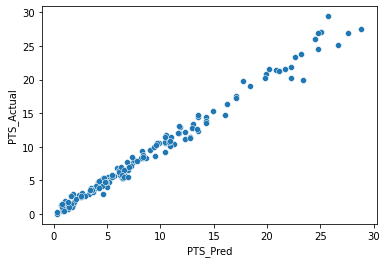

In [24]:
#making different visualizations

sns.scatterplot(x='PTS_Pred', y='PTS_Actual', data=df_pred)
plt.show() #almost too perfect...

<AxesSubplot:xlabel='PTS_Pred', ylabel='Dif'>

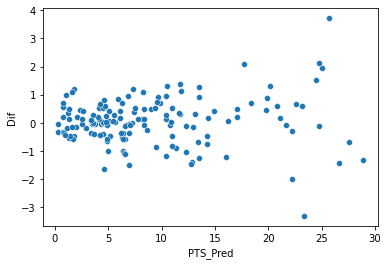

In [25]:
#vizualizing the difference between the actual and predicted values

sns.scatterplot(x='PTS_Pred', y='Dif', data=df_pred)

# the higher the PTS value the bigger the variance it seems

In [26]:
#I want to see the top 10 players with the biggest difference between the actual and predicted values

#--> It's actually not the biggest difference but the biggest difference in the positive direction

df_pred.sort_values(by='Dif', ascending=False).head(10)

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual,Dif
101,Stephen Curry,11.4,8.4,5.4,3.2,5.8,25.685366,29.4,3.714634
318,Donovan Mitchell,9.3,10.3,5.3,2.8,3.1,24.789462,26.9,2.110538
176,Tyrese Haliburton,7.3,7.5,3.0,2.7,3.2,17.708861,19.8,2.091139
218,Kyrie Irving,8.7,11.6,4.5,2.3,4.1,25.050463,27.0,1.949537
496,Zion Williamson,0.7,15.5,8.6,3.4,5.0,24.467812,26.0,1.532188
329,Trey Murphy III,5.6,3.7,2.0,0.7,2.9,11.728918,13.1,1.371082
23,Desmond Bane,7.1,9.0,3.8,2.2,4.3,20.184337,21.5,1.315663
68,Thomas Bryant,1.2,6.0,2.6,0.7,5.0,10.487788,11.8,1.312212
211,Kevin Huerter,6.7,4.7,1.9,1.4,2.8,13.531752,14.8,1.268248
210,Trevor Hudgins,0.5,0.0,1.5,0.0,0.0,1.791094,3.0,1.208906


In [27]:
#I want to see the top 10 players with the smallest difference between the actual and predicted values

#--> It's actually not the biggest difference but the biggest difference in the negative direction

df_pred.sort_values(by='Dif', ascending=True).head(10)

,Player,3PA,2PA,FTA,TOV,DRB,PTS_Pred,PTS_Actual,Dif
22,Paolo Banchero,4.2,11.3,7.6,2.7,5.6,23.321983,20.0,-3.321983
358,Kelly Oubre Jr.,7.4,10.4,4.0,1.3,3.6,22.205952,20.2,-2.005952
380,Trevelin Queen,2.1,2.0,0.7,1.0,1.3,4.646270,3.0,-1.646270
403,Ricky Rubio,3.5,2.4,0.9,0.8,2.3,6.993224,5.5,-1.493224
432,Isaiah Stewart,4.1,4.9,3.0,1.4,5.8,12.782274,11.3,-1.482274
417,Pascal Siakam,4.1,14.8,7.4,2.6,6.0,26.619682,25.2,-1.419682
469,John Wall,3.2,6.7,3.3,2.4,2.3,12.815414,11.4,-1.415414
325,Ja Morant,5.2,15.5,8.4,3.6,4.7,28.840200,27.5,-1.340200
274,Caris LeVert,4.4,6.3,2.7,1.6,3.3,13.558178,12.3,-1.258178
39,Saddiq Bey,5.6,6.0,4.0,1.0,3.5,16.025985,14.8,-1.225985


In [28]:
# I want to know the MSE for df_pred

mse = mean_squared_error(df_pred['PTS_Actual'], df_pred['PTS_Pred'])

print("Mean Squared Error:", mse)

Mean Squared Error: 0.6973612686940376


## Step 14: Saving the trained model

Save the Trained Model: After training and evaluating the model, it's important to save it for future use. This can be done using the serialization capabilities of the chosen machine learning library, such as pickle in Python.

In [30]:
import pickle

# Save the trained model
model_filename = "NBA_PTS_PREDICTOR.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)